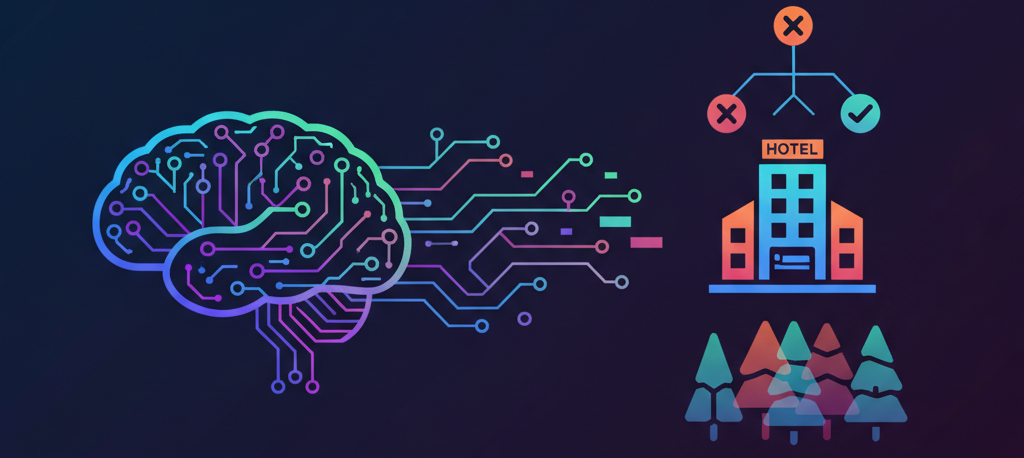

A feladat megoldásához szükséged lesz egy kaggle regisztrációra, valamint a kaggle.json authentikációs fileodra, hogy hozzáférj a szükséges datasethez: https://www.kaggle.com/discussions/general/74235

A notebook CPU-n is futtatható, a Google Colab környezete alapértelmezetten ehhez fog csatlakozni.

A méltán híres AIrbnb hotelt üzemelteted, ahol sikeres üzletpolitikádnak, a hotel nagyszerű adottságainak és természetesen a megnyerő szállásadónak köszönhetően teltház van egész nyárra. Ekkor érkezik a hír, hogy az anyósod ragaszkodik hozzá, hogy meglátogasson titeket a nyáron. Szerencsére nincs semmi dolga így neki mindegy mikor jön, viszont így valamelyik vendég foglalását vissza kell mondanod. Szeretnél a lehető legkevesebb bevételtől elesni, így igyekszel egy olyan vendégnek a foglalását törölni, aki várhatóan amúgy is visszamondaná a foglalását.

A feladat a korábbi foglalási adatok felhasználásával egy random forest alapú predikciós modellt készíteni, és azzal megjósolni, hogy melyik vendég foglalását érdemes visszamondani. Ha több vendég is várhatóan törölni fogja a foglalását, közűlük a legkevesebb pénzt fizető vendéget monddjuk vissza.


Ha nem sikerülne a kaggle letöltés, használd a csatolt file-okat!

Kaggle telepítése, autentikáció, dataset letöltése

In [ ]:
# Install the Kaggle library
!pip install kaggle -q

# Set up the Kaggle API key
from google.colab import files
import os

print("Please upload your kaggle.json file")
files.upload()

# Create a directory for Kaggle and move the API key there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
!kaggle datasets download -d ahsan81/hotel-reservations-classification-dataset

# Unzip the dataset
!unzip -q hotel-reservations-classification-dataset.zip -d hotel_data

Dataset betöltése

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_data/Hotel Reservations.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Display dataset information
print("\nDataset Info:")
df.info()

df.describe()

Feature engineering

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#TODO: Drop Booking_ID as it has no predictive value

#TODO: Encode the target variable(booking_status): Canceled = 1, Not_Canceled = 0

# Separate features (X) and target (y)
X = #TODO
y = #TODO

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

print(f"Categorical features: {list(categorical_features)}")
print(f"Numerical features: {list(numerical_features)}")

# Create preprocessing pipelines for numerical and categorical features
# For numerical data, scale it.
# For categorical data, one-hot encode it.
# TODO:

# Use ColumnTransformer to apply different transformations to different columns
preprocessor = # TODO:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=150,           # Number of trees in the forest
    class_weight='balanced',    # Adjust for class imbalance
    random_state=42,            # For reproducibility
    n_jobs=-1                   # Use all available CPU cores
)

#TODO: Create the full pipeline: Preprocessing -> Model


#TODO: Train the model



print("Model training completed")

In [ ]:
!gdown 14t0GAHkwXPNxCcSFmmiHXQR75cNfRUZP

In [ ]:
df_reservations = pd.read_csv('reservation_data.csv')
df_predict_cancel = df_reservations.copy()
df_predict_cancel.drop('Booking_ID', axis=1, inplace=True)
df_predict_cancel.head()

In [ ]:
#Store predictions
df_reservations['will_cancel'] = #TODO

# Filter rows where will_cancel is 1
df_will_cancel = #TODO

# Calculate the total price for these rows
df_will_cancel['total_price'] = #TODO

# Find the index of the row with the minimal total price
min_price_row_index = #TODO

# Get the row with the minimal total price
row_to_cancel = #TODO

display(row_to_cancel['Booking_ID'])